<a href="https://colab.research.google.com/github/rasenani/Hands-on-Quantum-Computing/blob/Fundamentals-of-quantum-gates!/Lab_00_Getting_a_feel_of_the_single_qubit_quantum_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit[visualization]

In [ ]:
import numpy as np
from qiskit import QuantumCircuit,transpile
from qiskit.quantum_info import Statevector,Operator
from qiskit.circuit.library import UnitaryGate

##Getting a feel of the quantum gates
Your task is to get a clear idea of what a quantum gate does to a well-defined quantum state. For that purpose we will first see the single qubit quantum gates and then the two qubit quantum gates.

##Single qubit gates :  
- X Gate :  
Action: Bit flip, Example: $|0\rangle$ --> $|1\rangle$ and
$|1\rangle$ --> $|0\rangle$
- Y Gate :  
Action:
- Z Gate :   
Action:
- Hadamard Gate :  
###Rotational Gates:  
- RX Gate:  
Action:
- RY Gate:  
Action:
- RZ Gate:  
Action:
- S Gate:  
Action:
- P Gate:  
Action:
###Exercise-01:  
You are to fill out the actions of the rest of the quantum gates by manipulating the following code blocks and interpreting the results.  
**As a bonus for your curious mind, you could try to find out the unitary matrix form of the given single qubit gates and calculate by hand the output of a playful circuit giving a superior concept of statevector manipulation through quantum gates.**

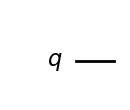

In [ ]:
qc = QuantumCircuit(1)
# Initializing a state of our choosing in the quantum circuit
# qc.initialize([0,1],0)
# qc.x(0)
# qc.y(0)
# qc.z(0)
# qc.h(0)
# Applying the rotational gates
phi = np.pi/2
# qc.rx(phi,0)
# qc.ry(phi,0)
# qc.rz(phi,0)
# qc.s(0)
# qc.p(phi,0)
qc.draw(output='mpl')

In [ ]:
# Shows the final statevector of the circuit defined in the previous codeblock.
# Keep in mind that the initial state is defined as |0> automatically in qiskit
# if not instructed otherwise.
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

###Exercise-02
Try to guess what the output of the following circuit would look like:

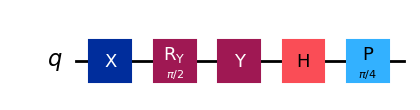

In [ ]:
qc_fun = QuantumCircuit(1)
qc_fun.x(0)
phi = np.pi/2
qc_fun.ry(phi,0)
qc_fun.y(0)
qc_fun.h(0)
qc_fun.p(phi/2,0)
qc_fun.draw(output='mpl')

In [ ]:
# You can check your answer by running this
Statevector(qc_fun).draw('latex')

Now we will try to implement this whole circuit using only a single qubit gate known as the **u** gate instead of using a whole series of gates. If our output remains the same then it doesn't matter which gates we use in our circuit to prepare that quantum state.

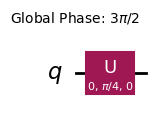

In [ ]:
U = Operator(qc_fun).data
# Wrap the matrix as a gate
U_gate = UnitaryGate(U)

# Create a wrapper circuit
qc_super = QuantumCircuit(1)
qc_super.append(U_gate, [0])

# Transpile using a minimal basis
qc_decomposed = transpile(qc_super, basis_gates=['u'], optimization_level=1)
qc_decomposed.draw(output='mpl')

In [ ]:
Statevector(qc_super).draw('latex')

<IPython.core.display.Latex object>

Now if you study what u3 is you would understand that the whole circuit **qc_fun** could be implemented without using a single quantum gate.

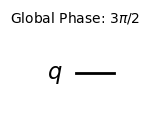

In [ ]:
qc_final = QuantumCircuit(1)
qc_final.global_phase = 3*np.pi/2
qc_final.draw(output='mpl')

In [ ]:
Statevector(qc_final).draw('latex')

<IPython.core.display.Latex object>

Lastly, if you understand what a global phase is, you would realize that this doesn't affect the overall measurement results of a quantum circuit. What this means is that the initial state $|0\rangle$ and the corresponding measurement result one would get hasn't changed throughout this whole notebook! So what is the point of this notebook!

##Key Realizations Summary
1. Global Phase is Unobservable  :
  - Transforming $|0\rangle$--> $i|0\rangle$ adds a global phase $i=e^{i\pi/2}$ .

  - No impact on measurements: Probabilities for $∣0\rangle$ and $i|0\rangle$ are identical.
2. U Gate Can Reproduce This (But Pointless)
  - U3(0, π/2, 0) or u(0, π/2, 0) reduces to  , but leaves $|0\rangle$ unchanged.
  - To explicitly add a global phase you would need to apply the intended global phase with coding approach as we have already seen # Not a physical gate!
  - Physical gates (like P(π/2)) only affect $|1⟩$, not $|0\rangle$.

3. The Point of the Exercises:
  - Concept and application:  Quantum gates are equivalent to unitary matrices in linear algebra applying on a quantum state which is actually just a column matrix with dimension depending on the number of qubits.

  - Pedagogy: Global phases are mathematically visible but physically irrelevant for isolated states.

  - Optimization: Complex circuits with only global phase changes can be simplified to no gates.

  - Warning: Global phases do matter in interference (e.g., controlled operations).

Created by: Animesh Banik  
Date: 07/31/2025

For further clarification,
contact:   
email: animesh4physics@gmail.com  
linkedin: https://www.linkedin.com/in/animesh-banik-276a5a2aa/